In [3]:
import numpy as np
import matplotlib.pyplot as plt
import dedalus.public as d3
import logging
logger = logging.getLogger(__name__)

In [4]:
import warnings
warnings.filterwarnings("ignore")

In [5]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import matplotlib as mpl
mpl.rc('text', usetex = True)
mpl.rc('font', family = 'serif')
mpl.rc('xtick', labelsize=18) 
mpl.rc('ytick', labelsize=18) 
mpl.rcParams.update({'font.size': 18})


In [6]:
Ri, Ro, Rb = 0.5, 4, 1 #note - Ri (inner radius) is 'a' from previous, also we will now have Rb as a parameter for the shelf break / edge of the bathymetry 
Nθ, Nr = 100, 50 #resolution (want higher in r than θ)
α = 1 #bathymetry parameter

coords = d3.CartesianCoordinates('θ', 'r')
dist = d3.Distributor(coords, dtype=np.complex128)
θ_basis = d3.Fourier(coords['θ'], Nθ, (0, 2*np.pi), dtype=np.complex128)
r_basis = d3.Chebyshev(coords['r'], Nr, (Ri, Ro))
θ, r = dist.local_grids(θ_basis, r_basis)

In [7]:
R,THETA = np.meshgrid(r,θ)
H_island = R**(2*α)
H_island[R>Rb] = 1

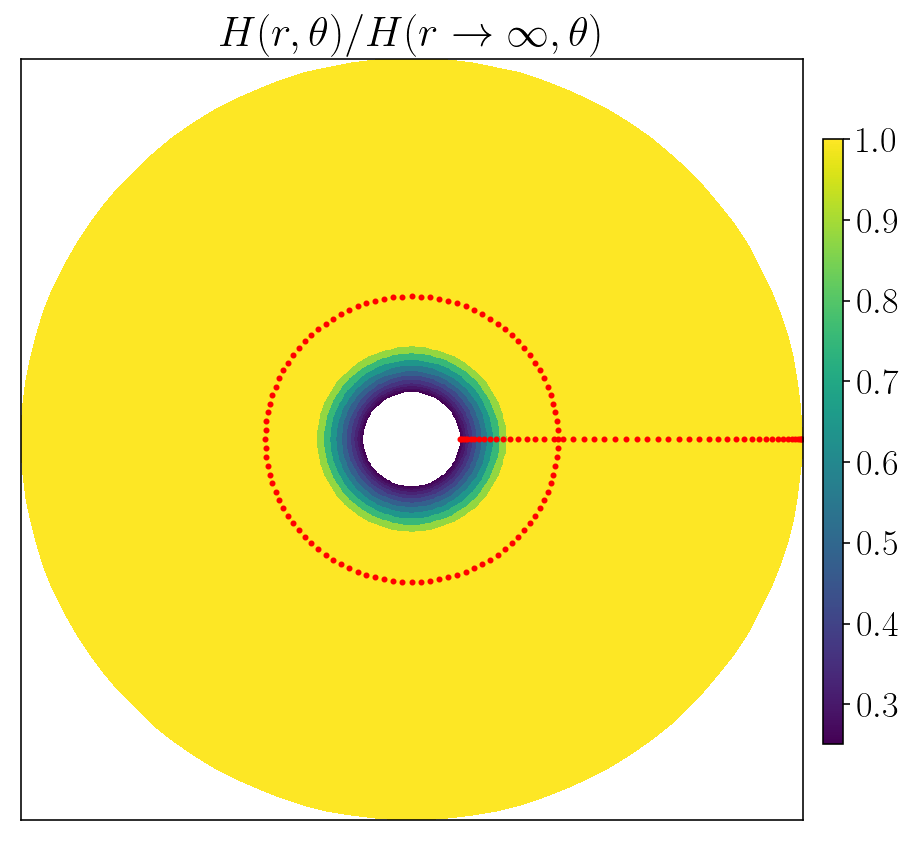

In [8]:
x = R*np.cos(THETA); y=R*np.sin(THETA)
fig,(ax) = plt.subplots(1,1, figsize=(7,7))
c=ax.pcolormesh(x,y,H_island)
ax.plot(r,0,'ro', markersize=2)
ax.plot(1.5*np.cos(θ),1.5*np.sin(θ),'ro', markersize=2)
ax.set_title(r'$H(r,\theta)/H(r\to\infty, \theta)$')
cax = fig.add_axes([0.92, 0.2, 0.02, 0.6])
cbar=plt.colorbar(c,cax = cax,orientation='vertical',shrink = 0.5)
ax.set_xticks([]);ax.set_yticks([])
plt.show()

So... I'm not sure it's worthwhile to define the ridge as straight (in cartesian) or fanning (in radial) but I'll try both. Cartesian would likely have some jumps in width, main concern...

## Fanning ridge

In [9]:
W = 5*np.diff(θ.T)[0][0]; C = np.pi
b = -np.log(2*0.25)/(2*W) ## this would let through some modes (Hmin double is half Hmin island)
H_ridge = np.exp(2*b*(np.abs(C-THETA)-W))
H_ridge[H_ridge>1] = 1

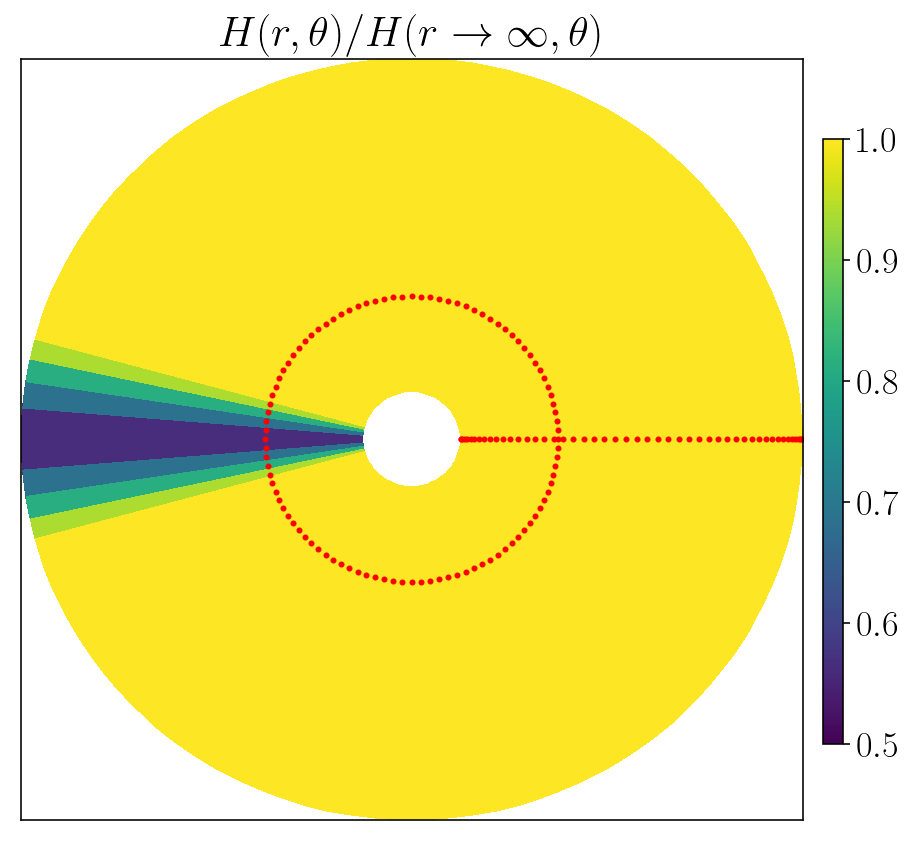

In [10]:
x = R*np.cos(THETA); y=R*np.sin(THETA)
fig,(ax) = plt.subplots(1,1, figsize=(7,7))
c=ax.pcolormesh(x,y,H_ridge)
ax.contourf(x,y,H_ridge, levels=[0.5,0.6,0.7,0.8,0.9], extend='both')
ax.plot(r,0,'ro', markersize=2)
ax.plot(1.5*np.cos(θ),1.5*np.sin(θ),'ro', markersize=2)
ax.set_title(r'$H(r,\theta)/H(r\to\infty, \theta)$')
cax = fig.add_axes([0.92, 0.2, 0.02, 0.6])
cbar=plt.colorbar(c,cax = cax,orientation='vertical',shrink = 0.5)
ax.set_xticks([]);ax.set_yticks([])
plt.show()

In [12]:
H = np.where(H_island<H_ridge,H_island,H_ridge)

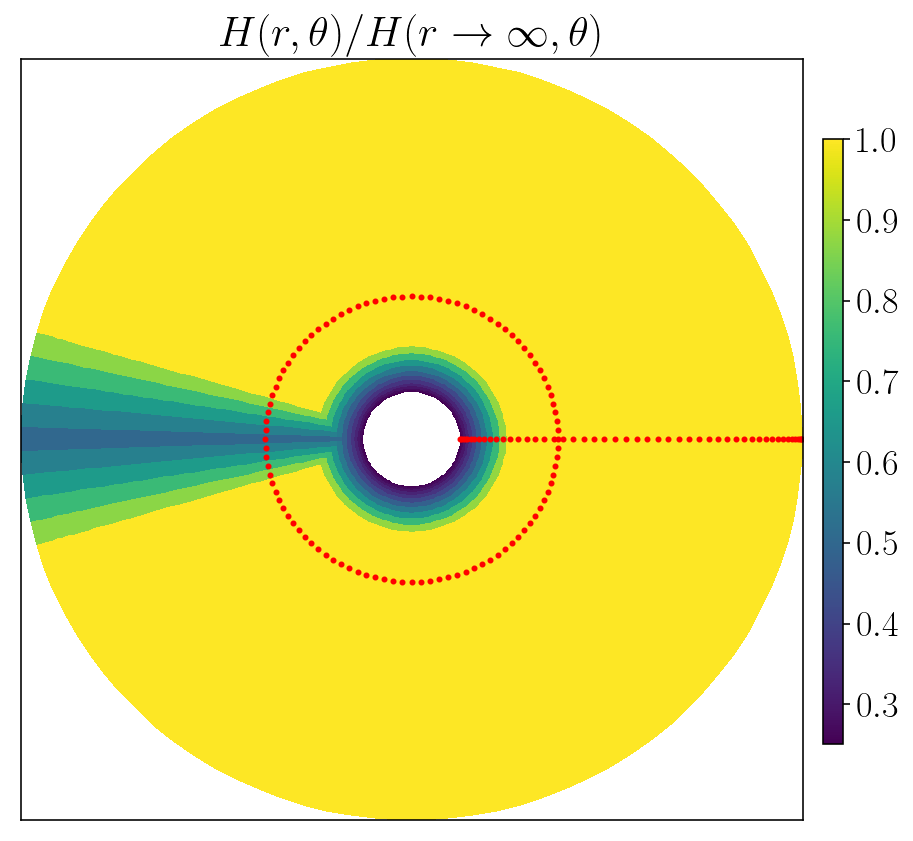

In [13]:
x = R*np.cos(THETA); y=R*np.sin(THETA)
fig,(ax) = plt.subplots(1,1, figsize=(7,7))
c=ax.pcolormesh(x,y,H)
ax.plot(r,0,'ro', markersize=2)
ax.plot(1.5*np.cos(θ),1.5*np.sin(θ),'ro', markersize=2)
ax.set_title(r'$H(r,\theta)/H(r\to\infty, \theta)$')
cax = fig.add_axes([0.92, 0.2, 0.02, 0.6])
cbar=plt.colorbar(c,cax = cax,orientation='vertical',shrink = 0.5)
ax.set_xticks([]);ax.set_yticks([])
plt.show()

In [14]:
W = 5*np.diff(θ.T)[0][0]; C = np.pi
b =  -np.log(0.25)/(2*W)## this would block all modes
H_ridge = np.exp(2*b*(np.abs(C-THETA)-W))
H_ridge[H_ridge>1] = 1
H_ridge[H_ridge>1] = 1
H = np.where(H_island<H_ridge,H_island,H_ridge)

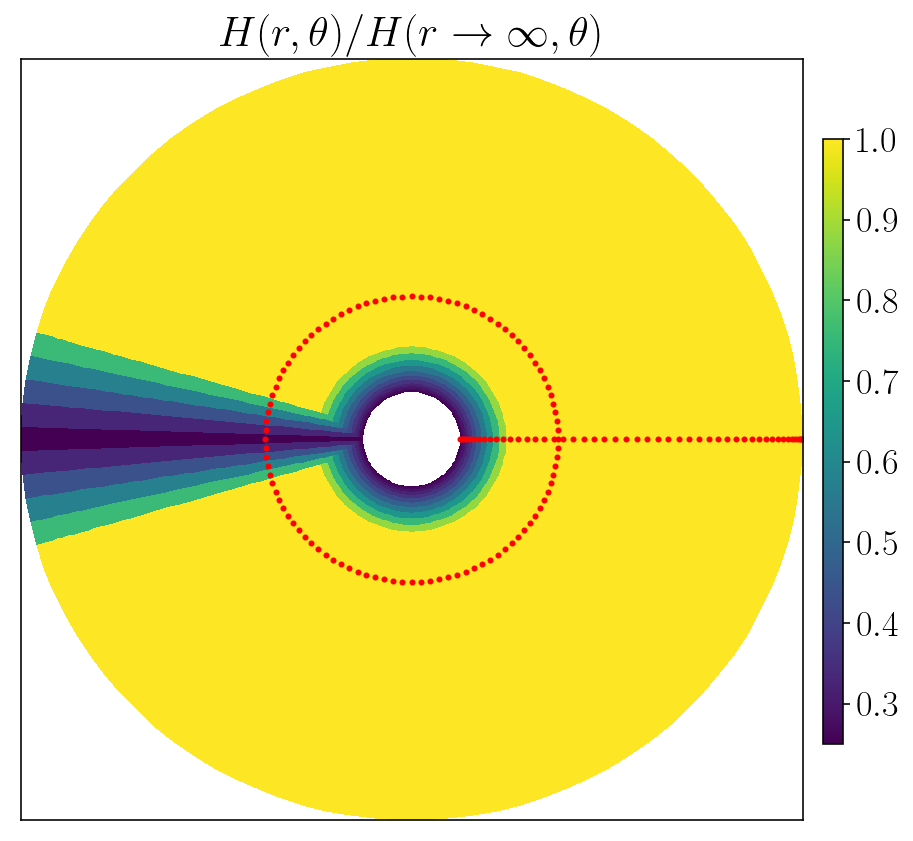

In [15]:
x = R*np.cos(THETA); y=R*np.sin(THETA)
fig,(ax) = plt.subplots(1,1, figsize=(7,7))
c=ax.pcolormesh(x,y,H)
ax.plot(r,0,'ro', markersize=2)
ax.plot(1.5*np.cos(θ),1.5*np.sin(θ),'ro', markersize=2)
ax.set_title(r'$H(r,\theta)/H(r\to\infty, \theta)$')
cax = fig.add_axes([0.92, 0.2, 0.02, 0.6])
cbar=plt.colorbar(c,cax = cax,orientation='vertical',shrink = 0.5)
ax.set_xticks([]);ax.set_yticks([])
plt.show()

Inclusion of a ridge end...

In [18]:
Rs = 3
H_ridge = np.exp(2*b*(np.abs(C-THETA)-W))
H_ridge[H_ridge>1] = 1
H_ridge[R>Rs] = H_ridge[R>Rs]*np.exp((R[R>Rs]-Rs))
H_ridge[H_ridge>1] = 1

In [19]:
H = np.where(H_island<H_ridge,H_island,H_ridge)

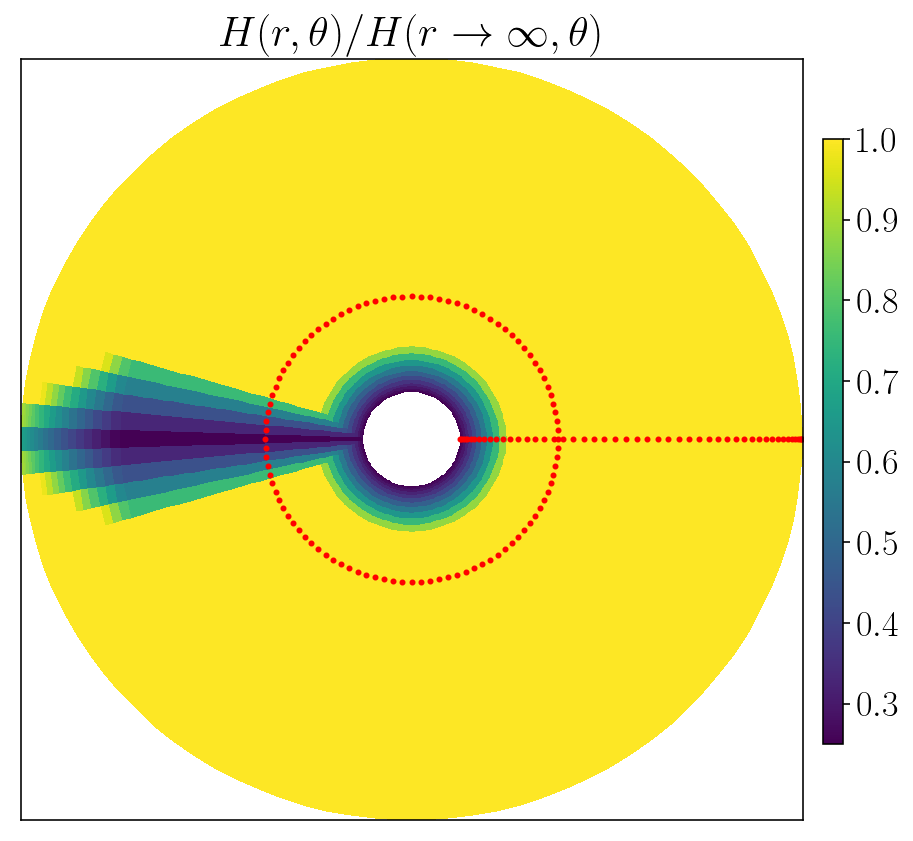

In [20]:
x = R*np.cos(THETA); y=R*np.sin(THETA)
fig,(ax) = plt.subplots(1,1, figsize=(7,7))
c=ax.pcolormesh(x,y,H)
ax.plot(r,0,'ro', markersize=2)
ax.plot(1.5*np.cos(θ),1.5*np.sin(θ),'ro', markersize=2)
ax.set_title(r'$H(r,\theta)/H(r\to\infty, \theta)$')
cax = fig.add_axes([0.92, 0.2, 0.02, 0.6])
cbar=plt.colorbar(c,cax = cax,orientation='vertical',shrink = 0.5)
ax.set_xticks([]);ax.set_yticks([])
plt.show()

## Straight ridge

In [21]:
W = 0.5*np.sin(5*np.diff(θ.T)[0][0]); C = np.pi
b = -np.log(2*0.25)/(2*W) ## this would let through some modes (Hmin double is half Hmin island)
H_ridge = np.exp(2*b*(np.abs(R*np.sin(C-THETA))-W))
H_ridge[H_ridge>1] = 1
H_ridge[H_ridge>1] = 1
H_ridge[THETA<C/2] = 1
H_ridge[THETA>3*C/2] = 1


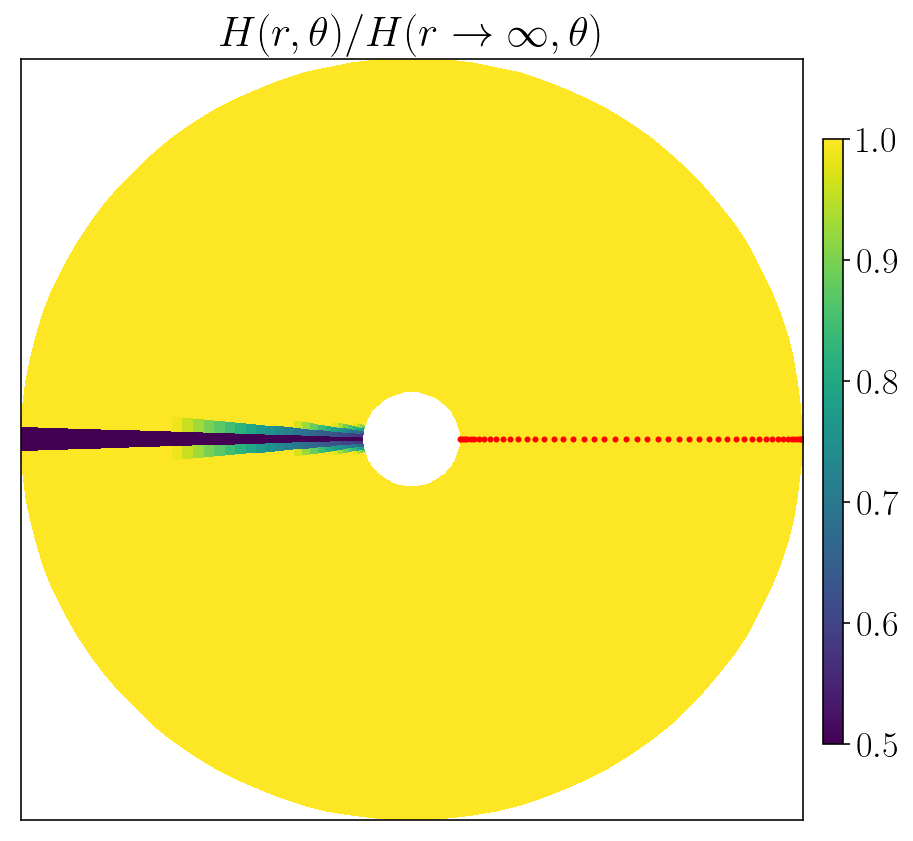

In [22]:
x = R*np.cos(THETA); y=R*np.sin(THETA)
fig,(ax) = plt.subplots(1,1, figsize=(7,7))
c=ax.pcolormesh(x,y,H_ridge)
ax.plot(r,0,'ro', markersize=2)

ax.set_title(r'$H(r,\theta)/H(r\to\infty, \theta)$')
cax = fig.add_axes([0.92, 0.2, 0.02, 0.6])
cbar=plt.colorbar(c,cax = cax,orientation='vertical',shrink = 0.5)
ax.set_xticks([]);ax.set_yticks([])
plt.show()

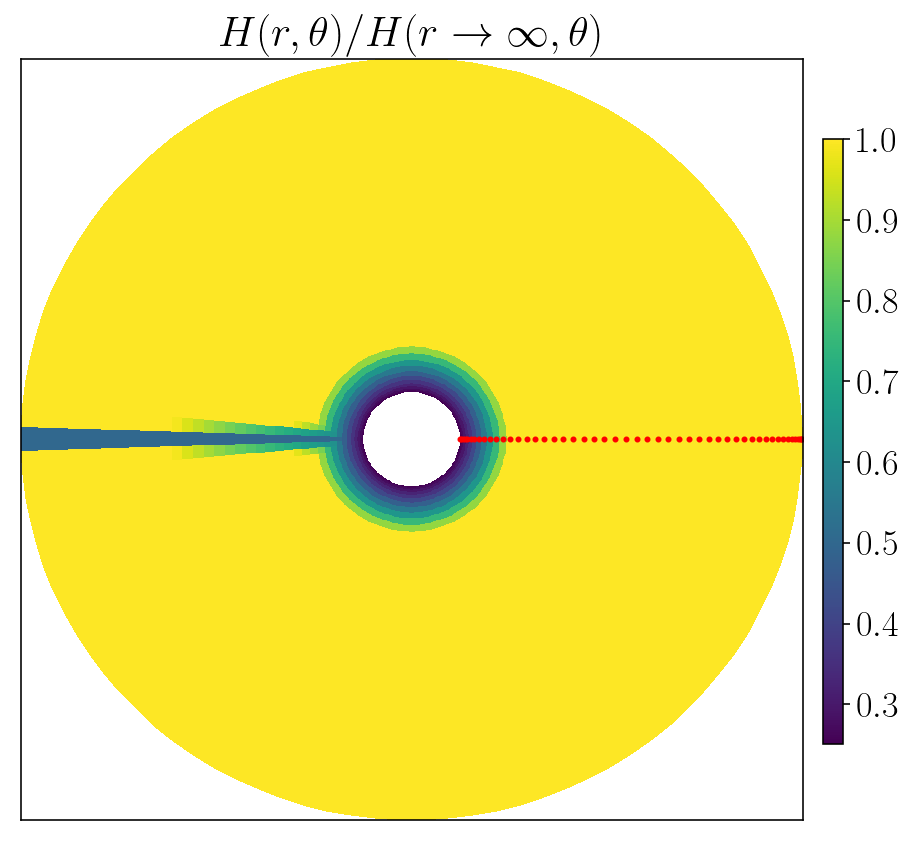

In [23]:
H = np.where(H_island<H_ridge,H_island,H_ridge)
x = R*np.cos(THETA); y=R*np.sin(THETA)
fig,(ax) = plt.subplots(1,1, figsize=(7,7))
c=ax.pcolormesh(x,y,H)
ax.plot(r,0,'ro', markersize=2)

ax.set_title(r'$H(r,\theta)/H(r\to\infty, \theta)$')
cax = fig.add_axes([0.92, 0.2, 0.02, 0.6])
cbar=plt.colorbar(c,cax = cax,orientation='vertical',shrink = 0.5)
ax.set_xticks([]);ax.set_yticks([])
plt.show()